train_cost is: 1.08057e-06
train_cost is: 1.0743e-06


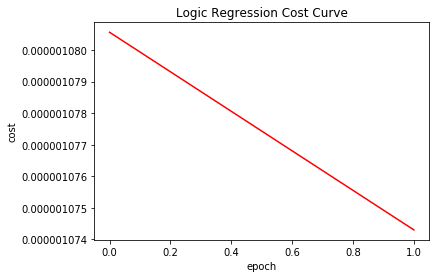

In [2]:
import tensorflow as tf  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
inputTensor=pd.read_csv("F:\\Machine+Deep Learning\\tensorInput.csv",sep=",",encoding="gbk")
  
#创建占位符  
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

#创建变量  
#tf.random_normal([1])返回一个符合正太分布的随机数  
w=tf.Variable(tf.random_normal([1,23],name='weight'))
b=tf.Variable(tf.random_normal([1,23],name='bias'))

y_predict=tf.sigmoid(tf.add(tf.multiply(X,w),b))
num_samples=len(inputTensor)
cost=tf.reduce_sum(tf.pow(y_predict-Y,2.0))/num_samples  

#学习率
lr=0.01
optimizer=tf.train.AdamOptimizer().minimize(cost)
  
#创建session 并初始化所有变量  
num_epoch=10
cost_accum=[]
cost_prev=0
#np.linspace（）创建agiel等差数组，元素个素为num_samples 产生数据源用来训练用
xs=inputTensor.drop(["y"],axis=1).as_matrix(columns=None)
ys=inputTensor["y"].as_matrix(columns=None)
with tf.Session() as sess:  
    #初始化所有变量
    sess.run(tf.initialize_all_variables())
    #开始训练  
    for epoch in range(num_epoch):
        for x,y in zip(xs,ys):
            sess.run(optimizer,feed_dict={X:x,Y:y})  
        train_cost=sess.run(cost,feed_dict={X:x,Y:y})  
        cost_accum.append(train_cost)  
        print ("train_cost is:",str(train_cost))
  
        #当误差小于10-6时 终止训练  
        if np.abs(cost_prev-train_cost)<1e-7:  
            break  
        #保存最终的误差  
        cost_prev=train_cost  
#画图  画出每一轮训练所有样本之后的误差
plt.plot(range(len(cost_accum)),cost_accum,'r')
plt.title('Logic Regression Cost Curve')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()